In [1]:
#!pip install wordcloud

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)


In [3]:
df=pd.read_csv('malignant_comments.csv',sep="\t")
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159616,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159617,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159618,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159619,fff125370e4aaaf3,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


EXPLORATORY DATA ANALYSIS

Analysing the dataset value counts using countplot

0.0    144239
1.0     15289
Name: malignant, dtype: int64


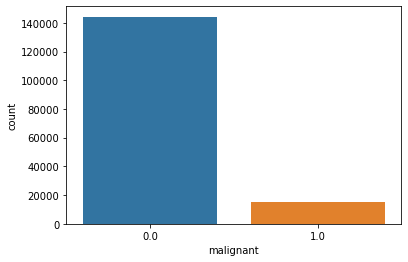

In [4]:
ax=sns.countplot('malignant',data=df)
print(df['malignant'].value_counts())

The target variable(malignant) is highly imbalanced with the 'NO'(0.0) class having 1,44,239(90% approx.) instances and the 'YES'(1.0) having only 15,289 instances.

0.0    157932
1.0      1596
Name: highly_malignant, dtype: int64


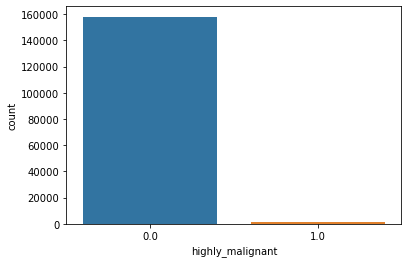

In [5]:
ax=sns.countplot('highly_malignant',data=df)
print(df['highly_malignant'].value_counts())

The 'highly_malignant' feature also has an imbalanced distribution with 0.0('NO') class constituting almost 99%(1,57,932) of the feature's data whereas 1.0('YES') category has only 1,596.

0.0    151084
1.0      8444
Name: rude, dtype: int64


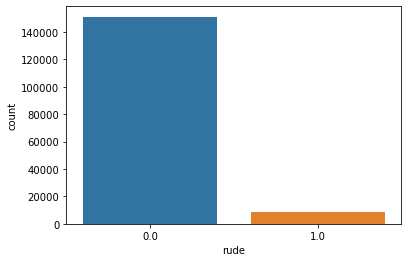

In [6]:
ax=sns.countplot('rude',data=df)
print(df['rude'].value_counts())

The rude feature is also imbalanced with 0.0('NO') category constituting 1,51,084(95% approx.) and "YES" category constituting 8,444(5% approx).

0.0    159050
1.0       478
Name: threat, dtype: int64


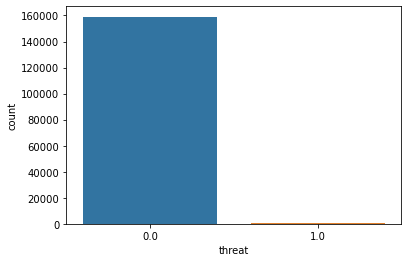

In [7]:
ax=sns.countplot('threat',data=df)
print(df['threat'].value_counts())

The threat feature was highly imbalanced with 0.0('NO') category constituting 1,59,050(99.5% approx.) of the data and 1.0('YES') having only 478 instances.

0.0    151653
1.0      7875
Name: abuse, dtype: int64


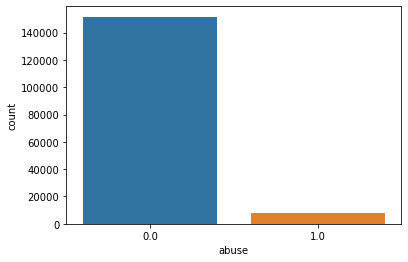

In [8]:
ax=sns.countplot('abuse',data=df)
print(df['abuse'].value_counts())

The abuse feature was also highly imbalanced with 0.0('NO') category constituting 1,51,653(95% approx.) and 1.0('YES') constituting 7875(5% approx) of the data.

0.0    158104
1.0      1405
Name: loathe, dtype: int64


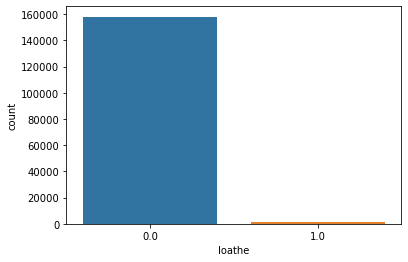

In [9]:
ax=sns.countplot('loathe',data=df)
print(df['loathe'].value_counts())

The loathe feature is highly imbalanced with 0.0('NO') category having 1,58,104(99% approx.) and 1.0('YES') has only 1,405 instances.

Checking for missing values

In [10]:
df.isnull().sum()

id                    0
comment_text         74
malignant            93
highly_malignant     93
rude                 93
threat               93
abuse                93
loathe              112
dtype: int64

Dropping the rows having missing values as the number of rows having them are negligible when compared to the dataset,hence not performing any replace operations as it may mislead the model.

In [11]:
df_new=df.dropna()
df_new.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [12]:
df_new.shape

(159509, 8)

Now comparing the independent features with the target features

<AxesSubplot:xlabel='highly_malignant', ylabel='malignant'>

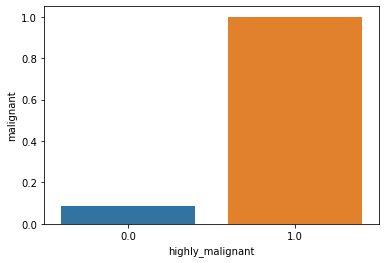

In [13]:
sns.barplot(x='highly_malignant',y='malignant',data=df_new)

In [14]:
#df_grp=['highly_malignant','malignant']
df_group=df_new.groupby('malignant')['highly_malignant'].count()
df_group

malignant
0.0    144220
1.0     15289
Name: highly_malignant, dtype: int64

In [15]:
count1=count2=count3=count4=0
for i in range(0,len(df)):
    if(df['malignant'][i]==1.0):
        if(df['malignant'][i]==1.0)and(df['highly_malignant'][i]==1.0):
            count1=count1+1
        elif(df['malignant'][i]==1.0)and(df['highly_malignant'][i]!=1.0):
            count2=count2+1
        elif(df['malignant'][i]!=1.0) and(df['highly_malignant'][i]==1.0):
            count3=count3+1
    else:
        count4=count4+1

In [16]:
print("highly_malignant aswell as  malignant",count1,count1/159621*100,'%')
print("just malignant",count2,count2/159621*100,'%')
print("highly malignant but not malignant",count3,count3/159621*100,'%')
print("other",count4,count4/159621*100,'%')

highly_malignant aswell as  malignant 1594 0.9986154703954994 %
just malignant 13695 8.57969816001654 %
highly malignant but not malignant 0 0.0 %
other 144332 90.42168636958796 %


In [17]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','highly_malignant'])
#print(LoanData.head())3
#################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['highly_malignant'])
CrosstabResult
 


highly_malignant,0.0,1.0
malignant,,
0.0,144220,0
1.0,13695,1594


<AxesSubplot:xlabel='malignant'>

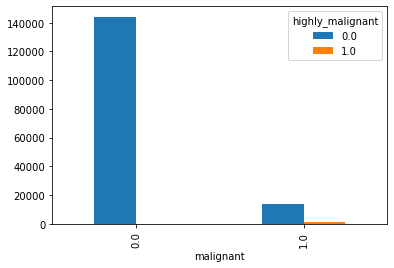

In [18]:
# Grouped bar chart between malignant and highly malignant
%matplotlib inline 
CrosstabResult.plot.bar()

OBSEVATION:
    1)Out of 15,289 malignant comments,1594 comments(10.4%) were highly malignant.
    2)All the comments that were not malignant were also not highly_malignant.
    3)13,695 comments out of 15,289 malignant(1.0) comments were not highly malignant.

MALIGNANT VS RUDE

In [19]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','rude'])
#print(LoanData.head())
#################################################
# Cross tabulation between Rude and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['rude'])
CrosstabResult
 


rude,0.0,1.0
malignant,,
0.0,143698,522
1.0,7367,7922


<AxesSubplot:xlabel='malignant'>

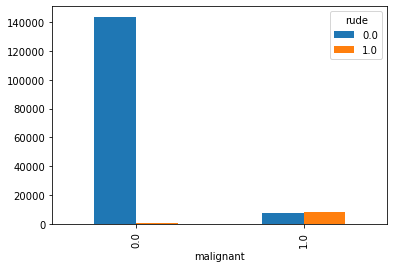

In [20]:
%matplotlib inline 
CrosstabResult.plot.bar()

OBSERVATIONS:
    1)7,922 comments were rude and malignant
    2)7637 comments were malignant but not rude
    3)522 comments were rude but not malignant
    4)1,43,698 comments were neither rude nor malignant.

MALIGNANT VS THREAT

In [21]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','threat'])
#print(LoanData.head())
#################################################
# Cross tabulation between threat and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['threat'])
CrosstabResult
 


threat,0.0,1.0
malignant,,
0.0,144191,29
1.0,14840,449


OBSERVATIONS:
    1)14,840 comments were malignant but not threatning.
    2)449 comments were malignant aswell as threatning.
    3)29 comments were threatning but not malignant.
    4)1,44,191 comments were neither malignant nor threatning.

MALIGNANT VS ABUSE

In [22]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','abuse'])
#print(LoanData.head())
#################################################
# Cross tabulation between abuse and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['abuse'])
CrosstabResult
 


abuse,0.0,1.0
malignant,,
0.0,143687,533
1.0,7947,7342


OBSERVATIONS:
    1)7,342 comments were malignant as well as abuse.
    2)7,947 comments were malignant but not abuse.
    3)533 comments were abuse but not malignant.
    4)1,43,687 comments were neither malignant nor abuse.

MALIGNANT VS LOATHE

In [23]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','loathe'])
#print(LoanData.head())
#################################################
# Cross tabulation between loathe and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['loathe'])
CrosstabResult
 


loathe,0.0,1.0
malignant,,
0.0,144117,103
1.0,13987,1302


OBSERVATIONS:
    1)1,302 comments were malignant and loathe
    2)13,987 comments were malignant but not loathe
    3)103 comments were loathe but not malignant
    4)1,44,117 comments were neither malignant nor loathe.

USING WORDCLOUD TO HIGHLIGHT THE MOST FREQUENTLY USED WORDS IN EACH OF THE TARGET FEATURES

In [24]:
from wordcloud import WordCloud

In [25]:
spams=df_new['comment_text'][df_new['malignant']==1]

In [26]:
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(''.join(spams))

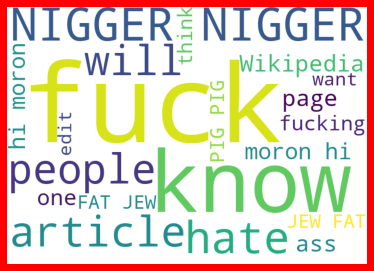

In [27]:
plt.figure(figsize=(5,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
#For 'Highly_Malignant' label

In [29]:
spams=df_new['comment_text'][df_new['highly_malignant']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(''.join(spams))
spam_cloud

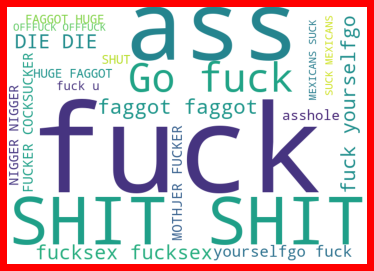

In [30]:
plt.figure(figsize=(5,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

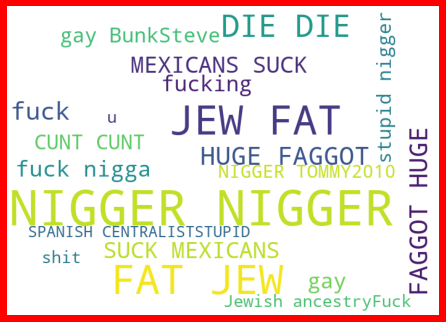

In [31]:
#For 'Loathe' label
spams=df_new['comment_text'][df_new['loathe']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(''.join(spams))
spam_cloud
plt.figure(figsize=(6,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

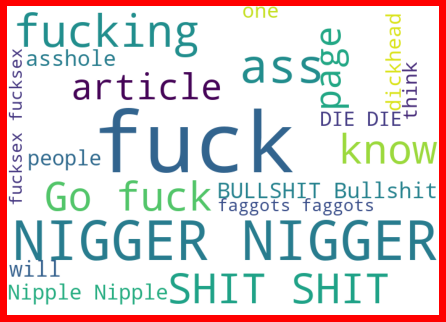

In [32]:
#for 'Rude' label
spams=df_new['comment_text'][df_new['rude']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(''.join(spams))
plt.figure(figsize=(6,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

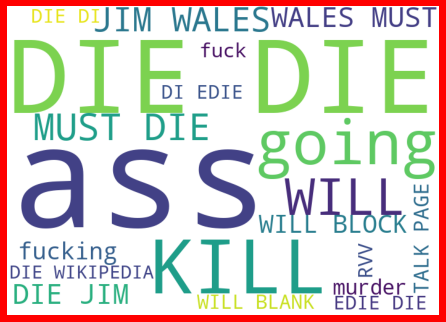

In [33]:
#for 'Threat' label
spams=df_new['comment_text'][df_new['threat']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(''.join(spams))
plt.figure(figsize=(6,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
#creating a subset of the dataframe by taking all the columns except id
df_sub=df_new.iloc[:,2:].sum()
df_sub

malignant           15289.0
highly_malignant     1594.0
rude                 8444.0
threat                478.0
abuse                7875.0
loathe               1405.0
dtype: float64

CLEANING THE TEXT DATA(removing stopwords,symbols,numbers etc) FOR PREPROCESSING

In [35]:
df_new['comment_text'][1000]

"Rex Mundi \n\nI've created a stub on Rex Mundi at Rex Mundi High School.  Only thing I know about it is that both my Aunt Donna and Bob Griese went there.  Please add anything you might know about it.\n\nBTW, my dad was a Panther; I live in Princeton myself."

In [36]:
# Import relevant packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords  # Remove useless words
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
df_new['comment_text']=df_new['comment_text'].astype(str)

In [38]:
alpha=lambda x:re.sub(r"\[[0-9]*\]",' ',x)

In [39]:
alpha2=lambda x:re.sub(r'\s+',' ',x)

In [40]:
alpha3=lambda x:x.lower()

In [41]:
alpha4=lambda x:re.sub(r'[0-9]+',' ',x)

In [42]:
alpha6=lambda x:x.translate(str.maketrans("","",string.punctuation))

In [43]:
stop_words=list(stopwords.words('english')+['ure','u','ur','im','uve'])


In [44]:
clean=[]
word=sent=''
for i in df_new['comment_text']:
    tokens=i.lower().split(" ")
    for token in tokens:
        if token not in stop_words:
            word=word+' '+token
        sent=sent+word
        word=''  
    clean.append(sent)
    sent=''
print(clean[1000])
        
      

 rex mundi 

i've created stub rex mundi rex mundi high school.  thing know aunt donna bob griese went there.  please add anything might know it.

btw, dad panther; live princeton myself.


In [45]:
clean[0]

" explanation\nwhy edits made username hardcore metallica fan reverted? vandalisms, closure gas voted new york dolls fac. please remove template talk page since i'm retired now.89.205.38.27"

In [46]:
df_new['comment_text']=clean

In [47]:
df_new['comment_text']=df_new['comment_text'].map(alpha).map(alpha3).map(alpha4).map(alpha6)

In [48]:
df_new['comment_text'][0]

' explanation\nwhy edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since im retired now    '

In [49]:
df_new['comment_text'][1000]

' rex mundi \n\nive created stub rex mundi rex mundi high school  thing know aunt donna bob griese went there  please add anything might know it\n\nbtw dad panther live princeton myself'

In [50]:
malig=['id','comment_text','malignant']

In [51]:
df_new[malig].columns

Index(['id', 'comment_text', 'malignant'], dtype='object')

In [52]:
x=df_new[malig].drop('malignant',axis=1)
y=df_new['malignant']

In [53]:
y.value_counts()

0.0    144220
1.0     15289
Name: malignant, dtype: int64

The target variable is largely imbalanced with less than 10% of its data in the malignant(1.0) category.
To resolve this a subset of the dataframe is taken which contained 50% of the rows in the malignant category and another 50% in the non-malignant category.

In [54]:
(df_new['malignant']==1).sum()

15289

In [55]:
bal1=df_new[df_new['malignant']==1]
bal1


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,cocksucker piss around work,1.0,1.0,1.0,0.0,1.0,0.0
12,0005c987bdfc9d4b,hey it\n talk \nwhat it exclusive group wp t...,1.0,0.0,0.0,0.0,0.0,0.0
16,0007e25b2121310b,bye \n\ndont look come think comming back tosser,1.0,0.0,0.0,0.0,0.0,0.0
42,001810bf8c45bf5f,gay antisemmitian \n\narchangel white tiger\n...,1.0,0.0,1.0,0.0,1.0,1.0
43,00190820581d90ce,fuck filthy mother ass dry,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
159544,fef4cf7ba0012866,\n\n previous conversation \n\nyou fucking sh...,1.0,0.0,1.0,0.0,1.0,1.0
159564,ff39a2895fc3b40e,mischievious pubic hair,1.0,0.0,0.0,0.0,1.0,0.0
159591,ffa33d3122b599d6,absurd edits \n\nyour absurd edits great whit...,1.0,0.0,1.0,0.0,1.0,0.0
159596,ffb47123b2d82762,\n\nhey listen ever delete edits ever im anno...,1.0,0.0,0.0,0.0,1.0,0.0


To balance the dataset for different target labels,samples of 0 and 1 categories were extracted from the original dataframe and merged into a new dataframe(unique for every target feature).

In [56]:
bal2=df_new[df_new['malignant']==0]
bal2


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation\nwhy edits made username hardcore...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,daww matches background colour im seemingly s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,hey man im really trying edit war guy constan...,0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,\nmore\ni cant make real suggestions improvem...,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,you sir hero chance remember page thats on,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159616,ffe987279560d7ff,and second time asking view completely contra...,0.0,0.0,0.0,0.0,0.0,0.0
159617,ffea4adeee384e90,ashamed \n\nthat horrible thing put talk page...,0.0,0.0,0.0,0.0,0.0,0.0
159618,ffee36eab5c267c9,spitzer \n\numm theres actual article prostit...,0.0,0.0,0.0,0.0,0.0,0.0
159619,fff125370e4aaaf3,looks like actually put speedy first version ...,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
balanced_mal=pd.concat([bal1,bal2[:15289]],axis=0)
balanced_mal['malignant'].value_counts()

0.0    15289
1.0    15289
Name: malignant, dtype: int64

In [58]:

from sklearn.model_selection import train_test_split, cross_val_score


# Import ML algos
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import MultinomialNB, BernoulliNB
#from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaBoostClassifier

In [59]:
bal1=df_new[df_new['highly_malignant']==1]
bal2=df_new[df_new['highly_malignant']==0]
print(bal1.shape)
print(bal2.shape)


(1594, 8)
(157915, 8)


In [60]:
balanced_hmal=pd.concat([bal1,bal2[:3000]],axis=0)
balanced_hmal['highly_malignant'].value_counts()

0.0    3000
1.0    1594
Name: highly_malignant, dtype: int64

In [61]:
bal1=df_new[df_new['rude']==1]
bal2=df_new[df_new['rude']==0]
print(bal1.shape)
print(bal2.shape)

(8444, 8)
(151065, 8)


In [62]:
bal_rude=pd.concat([bal1,bal2[:10000]],axis=0)
bal_rude.shape

(18444, 8)

In [63]:
#Threat
bal1=df_new[df_new['threat']==1]
bal2=df_new[df_new['threat']==0]
print(bal1.shape)
print(bal2.shape)

(478, 8)
(159031, 8)


In [64]:
bal_threat=pd.concat([bal1,bal2[:1000]],axis=0)
bal_threat.shape

(1478, 8)

In [65]:
#abuse
bal1=df_new[df_new['abuse']==1]
bal2=df_new[df_new['abuse']==0]
print(bal1.shape)
print(bal2.shape)

(7875, 8)
(151634, 8)


In [66]:
bal_abuse=pd.concat([bal1,bal2[:15000]],axis=0)
bal_abuse.shape

(22875, 8)

In [67]:
#loathe
bal1=df_new[df_new['loathe']==1]
bal2=df_new[df_new['loathe']==0]
print(bal1.shape)
print(bal2.shape)

(1405, 8)
(158104, 8)


In [68]:
bal_loathe=pd.concat([bal1,bal2[:2800]],axis=0)
bal_loathe.shape

(4205, 8)

Since the problem statement focuses on identifying the malignant/abuse/threat/loathe/highly_malignant classes from the normal ones,f1 score was used as the primary metric for selecting our model.

ALGORITHMS like Adaboostclassifier,DecisionTreeClassifier,KNeighborsClassifier were also used apart from LogisticRegression,RandomForest and SVC.SVC was discarded because although it gave the best f1_score,it took forever to process the data.LinearSVC() also did a great job in classifying the 0 and 1 categories of the target columns but it could not be used for predicting the probability of the features as it does not have a predict.proba method. 

TFID Vectorizer is being used to assign a vector to each word in the text data,therefore keeping the meaning/context in play.

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [71]:
y=df_new['malignant']
x=df_new['comment_text']


tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
X=tfv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)


In [74]:
balanced_dataset=pd.concat([balanced_mal,balanced_hmal,bal_rude,bal_threat,bal_abuse,bal_loathe],axis=0)
balanced_dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,cocksucker piss around work,1.0,1.0,1.0,0.0,1.0,0.0
12,0005c987bdfc9d4b,hey it\n talk \nwhat it exclusive group wp t...,1.0,0.0,0.0,0.0,0.0,0.0
16,0007e25b2121310b,bye \n\ndont look come think comming back tosser,1.0,0.0,0.0,0.0,0.0,0.0
42,001810bf8c45bf5f,gay antisemmitian \n\narchangel white tiger\n...,1.0,0.0,1.0,0.0,1.0,1.0
43,00190820581d90ce,fuck filthy mother ass dry,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2826,079b036fed8995db,know human excrement pretty fast find vandali...,1.0,0.0,0.0,0.0,1.0,0.0
2827,079bf93384771454,\n\ni appreciate sentiment nice know others w...,0.0,0.0,0.0,0.0,0.0,0.0
2828,079c08cf3721f35e,\n\nto tha undertaker\nif want promote yourse...,0.0,0.0,0.0,0.0,0.0,0.0
2829,079eaf68ae081d68,speak people ireland make laugh great britain...,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#Malignant
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x=balanced_dataset['comment_text']
X=tfv.fit_transform(x)
y=balanced_dataset['malignant']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
lr1=LogisticRegression()

lr1.fit(x_train,y_train)
pred_log=lr1.predict(x_test)
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

0.9306364776163434
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     15279
         1.0       0.96      0.88      0.92     11839

    accuracy                           0.93     27118
   macro avg       0.93      0.93      0.93     27118
weighted avg       0.93      0.93      0.93     27118



In [85]:
#RandomForest
rfc1=RandomForestClassifier(criterion='entropy')
rfc1.fit(x_train,y_train)
pred_rfc=rfc1.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.9532782653588022
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     15279
         1.0       0.98      0.91      0.94     11839

    accuracy                           0.95     27118
   macro avg       0.96      0.95      0.95     27118
weighted avg       0.95      0.95      0.95     27118



In [114]:
#threat
lr2=LogisticRegression()
x=bal_threat['comment_text']

X=tfv.transform(x)
y=bal_threat['threat']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)


lr2.fit(x_train,y_train)
pred_log=lr2.predict(x_test)
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

0.8442622950819673
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90       331
         1.0       0.99      0.52      0.68       157

    accuracy                           0.84       488
   macro avg       0.90      0.76      0.79       488
weighted avg       0.87      0.84      0.83       488



In [115]:
#RandomForest
rfc2=RandomForestClassifier(criterion='entropy')
rfc2.fit(x_train,y_train)
pred_rfc=rfc2.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.8913934426229508
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       331
         1.0       0.96      0.69      0.80       157

    accuracy                           0.89       488
   macro avg       0.91      0.84      0.86       488
weighted avg       0.90      0.89      0.89       488



In [116]:
#abuse
lr3=LogisticRegression()
x=bal_abuse['comment_text']
X=tfv.transform(x)
y=bal_abuse['abuse']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)


lr3.fit(x_train,y_train)
pred_log=lr3.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy: 0.8969399920519274
0.8969399920519274
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      4966
         1.0       0.94      0.74      0.83      2583

    accuracy                           0.90      7549
   macro avg       0.91      0.86      0.88      7549
weighted avg       0.90      0.90      0.89      7549



In [117]:
#RandomForest
rfc3=RandomForestClassifier(criterion='entropy')
rfc3.fit(x_train,y_train)
pred_rfc=rfc3.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.9052854682739435
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      4966
         1.0       0.93      0.78      0.85      2583

    accuracy                           0.91      7549
   macro avg       0.91      0.88      0.89      7549
weighted avg       0.91      0.91      0.90      7549



In [118]:
#loathe
lr4=LogisticRegression()
x=bal_loathe['comment_text']
X=tfv.transform(x)
y=bal_loathe['loathe']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)


lr4.fit(x_train,y_train)
pred_log=lr4.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy: 0.8451008645533141
0.8451008645533141
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       909
         1.0       0.94      0.59      0.72       479

    accuracy                           0.85      1388
   macro avg       0.88      0.78      0.81      1388
weighted avg       0.86      0.85      0.83      1388



In [119]:
#RandomForest
rfc4=RandomForestClassifier(criterion='entropy')
rfc4.fit(x_train,y_train)
pred_rfc=rfc4.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.8760806916426513
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       909
         1.0       0.92      0.71      0.80       479

    accuracy                           0.88      1388
   macro avg       0.89      0.84      0.85      1388
weighted avg       0.88      0.88      0.87      1388



In [120]:
#highly malignant
lr5=LogisticRegression()
x=balanced_hmal['comment_text']
X=tfv.transform(x)
y=balanced_hmal['highly_malignant']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=52)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
#x_train_tfv5=tfv.transform(x_train)
#x_test_tfv5=tfv.transform(x_test)
lr5.fit(x_train,y_train)
pred_log=lr5.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy: 0.8852999340804218
0.8852999340804218
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       974
         1.0       0.94      0.72      0.82       543

    accuracy                           0.89      1517
   macro avg       0.90      0.85      0.87      1517
weighted avg       0.89      0.89      0.88      1517



In [121]:
#RandomForest
rfc5=RandomForestClassifier(criterion='gini',min_samples_split= 4,n_estimators=300)
rfc5.fit(x_train,y_train)
pred_rfc=rfc5.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.9301252471984179
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       974
         1.0       0.93      0.87      0.90       543

    accuracy                           0.93      1517
   macro avg       0.93      0.92      0.92      1517
weighted avg       0.93      0.93      0.93      1517



RandomForestClassifier was selected as our best model as it had a better f1_score than LogisticRegression.

HyperparameterTuning our model using Randomized Search CV.

In [88]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [94]:
#Malignant
x=balanced_dataset['comment_text']
X=tfv.transform(x)
y=balanced_dataset['malignant']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [96]:

model=RandomForestClassifier()
parameters={'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,500],
            'min_samples_split':range(2,10,2),
           
           }


In [97]:
grid_search=RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': [100, 200, 300, 500]})

In [99]:
best_params=grid_search.best_params_
print(best_params)

{'n_estimators': 300, 'min_samples_split': 4, 'criterion': 'gini'}


In [100]:
grid_search.best_score_

0.9469449679864763

Different RandomForestClassifier algorithms were used for predicting the different target variables.

Saving the models using pickle

In [101]:
df_test=pd.read_csv('malignant_comments_classifier(test).csv',sep='\t')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153181,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153182,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153183,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153184,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [102]:
df_test.drop('id',axis=1,inplace=True)

Performing the same type of data cleaning/preprocessing  operations on the test data as was done on the training data.

In [105]:
#removing the stopwords
clean=[]
word=sent=''
for i in df_test['comment_text']:
    tokens=i.lower().split(" ")
    for token in tokens:
        if token not in stop_words:
            word=word+' '+token
        sent=sent+word
        word=''  
    clean.append(sent)
    sent=''
print(clean[1000])
        

  dear welcome wikipediaunfortunately using email address username good idea wikipedia content extensively copied site one visited sites world edit make wikipedia username attached using email address make tempting target spammers recommend change username wikipediachanging username order prevent abuseif need help simply contact talk page go wikipediahelp desk another option place talk page someone come shortly help remember sign posts talk pages four tildes  welcome  


In [106]:
#Cleaning the text data

alpha=lambda x:re.sub(r"\[[0-9]*\]",' ',x)

alpha3=lambda x:x.lower()
alpha4=lambda x:re.sub(r'[0-9]',' ',x)
alpha5=lambda x:re.sub(r'\s+'," ",x)
alpha6=lambda x:x.translate(str.maketrans("","",string.punctuation))
df_test['comment_text']=df_test['comment_text'].map(alpha).map(alpha3).map(alpha4).map(alpha5).map(alpha6)

In [107]:
df_test['comment_text'][0]

'yo bitch ja rule is more succesful then youll ever be whats up with you and hating you sad mofuckasi should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother toofuckin white boys get things right next time'

In [109]:

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
test_data=tfv.transform(df_test['comment_text'])
test_data

<153186x71786 sparse matrix of type '<class 'numpy.float64'>'
	with 3095302 stored elements in Compressed Sparse Row format>

SAVING THE Random Forest Classifier MODEL FOR FUTURE USE

In [110]:
import pickle
filename1='malignant_comments_classifier.sav'
pickle.dump(rfc1,open(filename1,'wb'))

#for highly malignant comments

In [122]:
filename2='highly_malignant_comments_classifier.sav'
pickle.dump(rfc5,open(filename2,'wb'))

FOR ABUSE TYPE COMMENTS

In [123]:
filename3='abuse_comments_classifier.sav'
pickle.dump(rfc3,open(filename3,'wb'))

FOR COMMENTS POSING THREAT

In [124]:
filename4='threatning_comments_classifier.sav'
pickle.dump(rfc2,open(filename4,'wb'))

FOR LOATHE TYPE OF COMMENTS

In [125]:
filename5='loathe_comments_classifier.sav'
pickle.dump(rfc4,open(filename5,'wb'))

In [126]:
#Saving the tf-idf vectorizer trained on the dataset
filename6='comments_classifier(vectorizer).sav'
pickle.dump(tfv,open(filename6,'wb'))

RELOADING THE MODELS FOR MAKING PREDICTIONS ON THE TEST DATA

In [127]:
load_model1=pickle.load(open(filename1,'rb'))

In [128]:
predictions1=load_model1.predict_proba(test_data)
predictions1

array([[0.15      , 0.85      ],
       [0.92802817, 0.07197183],
       [0.93434705, 0.06565295],
       ...,
       [0.84      , 0.16      ],
       [0.92      , 0.08      ],
       [0.18      , 0.82      ]])

In [129]:
#for highly malignant
load_model2=pickle.load(open(filename2,'rb'))

In [130]:
predictions2=load_model2.predict_proba(test_data)
predictions2

array([[0.32887698, 0.67112302],
       [0.89580291, 0.10419709],
       [0.88100132, 0.11899868],
       ...,
       [0.96268254, 0.03731746],
       [0.95357143, 0.04642857],
       [0.81215873, 0.18784127]])

In [131]:
#for abusive comments
load_model3=pickle.load(open(filename3,'rb'))

In [132]:
predictions3=load_model3.predict_proba(test_data)
predictions3

array([[0.16      , 0.84      ],
       [0.95360665, 0.04639335],
       [0.9338261 , 0.0661739 ],
       ...,
       [0.96489496, 0.03510504],
       [0.97875   , 0.02125   ],
       [0.48      , 0.52      ]])

In [133]:
#for threatning comments
load_model4=pickle.load(open(filename4,'rb'))

In [134]:
predictions4=load_model4.predict_proba(test_data)
predictions4

array([[0.52, 0.48],
       [0.72, 0.28],
       [0.96, 0.04],
       ...,
       [0.94, 0.06],
       [0.93, 0.07],
       [0.72, 0.28]])

In [135]:
#for loathe type of comments
load_model5=pickle.load(open(filename5,'rb'))

In [136]:
predictions5=load_model5.predict_proba(test_data)
predictions5

array([[0.31833333, 0.68166667],
       [0.78862193, 0.21137807],
       [0.87904257, 0.12095743],
       ...,
       [0.88882035, 0.11117965],
       [0.59125   , 0.40875   ],
       [0.74      , 0.26      ]])

CALCULATING PROBABILITY OF EACH OF THE COMMENTS FALLING UNDER DIFFERENT CATEGORIES.

CREATING A DATAFRAME FOR THE TEST DATA AND ITS PREDICTIONS

In [137]:
text=list(df_test['comment_text'])
malignant=list(predictions1[:,1])
h_malignant=list(predictions2[:,1])
abuse=list(predictions3[:,1])
threat=list(predictions4[:,1])
loathe=list(predictions5[:,1])

In [138]:
DICTIONARY={'comment_text':text,'malignant(in%)':malignant,'highly_malignant(in%)':h_malignant,'abuse(in%)':abuse,'threat(in%)':threat,'loathe(in%)':loathe}

The test dataset with the comment text along with the respective probabilities of the comment falling under different categories.

In [139]:
test_result=pd.DataFrame(data=DICTIONARY)
test_result

,comment_text,malignant(in%),highly_malignant(in%),abuse(in%),threat(in%),loathe(in%)
0,yo bitch ja rule is more succesful then youll ...,0.850000,0.671123,0.840000,0.48,0.681667
1,from rfc the title is fine as it is imo,0.071972,0.104197,0.046393,0.28,0.211378
2,sources zawe ashton on lapland â€”,0.065653,0.118999,0.066174,0.04,0.120957
3,if you have a look back at the source the info...,0.090000,0.058710,0.030000,0.08,0.020000
4,i dont anonymously edit articles at all,0.540000,0.252218,0.430625,0.18,0.190000
...,...,...,...,...,...,...
153181,i totally agree this stuff is nothing but too...,0.160000,0.105726,0.125480,0.18,0.098095
153182,throw from out field to home plate does it ge...,0.483599,0.157780,0.285059,0.23,0.320763
153183,okinotorishima categories i see your changes ...,0.160000,0.037317,0.035105,0.06,0.111180
153184,one of the founding nations of the eu germany...,0.080000,0.046429,0.021250,0.07,0.408750


STORING PREDICTIONS(in terms of probability) MADE ON TEST DATA IN A CSV FILE.

In [140]:
test_result.to_csv('comments_classifier(predicted)')

END OF WORKSHEET